# Scalars

Computer numbers and mathematical numbers are not the same thing. Knowing how numbers are represented on a computer can prevent unintended consequences.

Integers
- binary representation - everything in a computer is represented with a 0 or 1
- little and big endian
- overflow
- integer division


Reals
- floating point representation
- small values have more precision than big values
- floating point numbers are approximations
- underflow
- catastrophic cancellation
- numerically stable algorithms

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Integers

### Binary representation of integers

In [3]:
format(16, 'b') # 2 to the fourth power

'10000'

If we use 32 bits

In [4]:
format(16, '032b')

'00000000000000000000000000010000'

### Bit shifting

In [5]:
format(16 >> 2, '032b')

'00000000000000000000000000000100'

In [6]:
16 >> 2

4

In [7]:
format(16 << 2, '032b')

'00000000000000000000000001000000'

In [8]:
16 << 2

64

## Endianess

This refers to how the bytes that make up an integer are stored in the computer. Big Endian means that the most significant byte (8 bits) is stored at the lowest address, while Little Endian means that the least significant byte is stored at the lowest address.

![](https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/bigLittleEndian.gif)

For the most part you don't have to care about this unless your code involves manipulating the internal structure of integers.

In [9]:
x = 1234
x.to_bytes(2, 'big')

b'\x04\xd2'

In [10]:
x.to_bytes(2, 'little')

b'\xd2\x04'

In [11]:
int.from_bytes(x.to_bytes(2, 'big'), 'big')

1234

Errors occurs if you mis-interpret the byte order

In [12]:
int.from_bytes(x.to_bytes(2, 'big'), 'little')

53764

### Overflow

In general, the computer representation of integers has a limited range, and may overflow. The range depends on whether the integer is signed or unsigned.

For example, with 8 bits, we can represent at most $2^8 = 256$ integers.

- 0 to 255 unsigned
- -128 ti 127 signed

Signed integers

In [13]:
np.arange(130, dtype=np.int8)[-5:]

array([ 125,  126,  127, -128, -127], dtype=int8)

Unsigned integers

In [14]:
np.arange(130, dtype=np.uint8)[-5:]

array([125, 126, 127, 128, 129], dtype=uint8)

In [15]:
np.arange(260, dtype=np.uint8)[-5:]

array([255,   0,   1,   2,   3], dtype=uint8)

### Integer division

In Python 2 or other languages such as C/C++, be very careful when dividing as the division operator `/` performs integer division when both numerator and denominator are integers. This is rarely what you want. In Python 3 the `/` always performs floating point division, and you use `//` for integer division, removing a common source of bugs in numerical calculations.

In [16]:
%%python2

import numpy as np

x = np.arange(10)
print(x/10)

Traceback (most recent call last):
  File "<stdin>", line 2, in <module>
ImportError: No module named numpy


If the code above could run, it would give all zeros due to integer division. Same as below:

In [18]:
x = np.arange(10)
x // 10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Python 3 does the "right" thing.

In [17]:
x = np.arange(10)
x/10

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## Real numbers

Real numbers are represented as **floating point** numbers. A floating point number is stored in 3 pieces (sign bit, exponent, mantissa) so that every float is represetned as get +/- mantissa ^ exponent. Because of this, the interval between consecutive numbers is smallest (high precison) for numebrs close to 0 and largest for numbers close to the lower and upper bounds.

Because exponents have to be singed to represent both small and large numbers, but it is more convenint to use unsigned numbers here, the exponnent has an offset (also knwnn as the exponentn bias). For example, if the expoennt is an unsigned 8-bit number, it can rerpesent the range (0, 255). By using an offset of 128, it will now represent the range (-127, 128).

![float1](http://www.dspguide.com/graphics/F_4_2.gif)

**Note**: Intervals between consecutive floating point numbers are not constant. In particular, the precision for small numbers is much larger than for large numbers. In fact, approximately half of all floating point numbers lie between -1 and 1 when using the `double` type in C/C++ (also the default for `numpy`).

![float2](http://jasss.soc.surrey.ac.uk/9/4/4/fig1.jpg)

Because of this, if you are adding many numbers, it is more accurate to first add the small numbers before the large numbers.

#### IEEE 754 32-bit floating point representation

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

See [Wikipedia](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) for how this binary number is evaluated to 0.15625.

In [19]:
from ctypes import c_int, c_float

In [20]:
s = c_int.from_buffer(c_float(-0.15625)).value

In [21]:
s = format(s, '032b')
s

'-1000001111000000000000000000000'

In [22]:
rep = {
    'sign': s[:1], 
    'exponent' : s[1:9:], 
    'fraction' : s[9:]
}
rep

{'exponent': '10000011', 'fraction': '11000000000000000000000', 'sign': '-'}

### Most base 10 real numbers are approximations

This is simply because numbers are stored in finite-precision binary format.

In [23]:
'%.20f' % (0.1 * 0.1 * 100)

'1.00000000000000022204'

### Never check for equality of floating point numbers

In [25]:
i = 0
loops = 0
while i != 1:
    i += 0.1 * 0.1
    loops += 1
    if loops == 1000000:
        break
i

10000.000000171856

In [24]:
i = 0
loops = 0
while np.abs(1 - i) > 1e-6:
    i += 0.1 * 0.1
    loops += 1
    if loops == 1000000:
        break
i

1.0000000000000007

### Associative law does not necessarily hold

In [26]:
6.022e23 - 6.022e23 + 1

1.0

In [27]:
1 + 6.022e23 - 6.022e23

0.0

### Distributive law does not hold

In [28]:
a = np.exp(1)
b = np.pi
c = np.sin(1)

In [29]:
a*(b+c)

10.82708950985241

In [30]:
a*b + a*c

10.827089509852408

### Catastrophic cancellation

Consider calculating sample variance

$$
s^2= \frac{1}{n(n-1)}\sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2
$$

Be  careful whenever you calculate the difference of potentially big numbers.

In [31]:
def var(x):
    """Returns variance of sample data using sum of squares formula."""
    
    n = len(x)
    return (1.0/(n*(n-1))*(n*np.sum(x**2) - (np.sum(x))**2))

### Numerically stable algorithms

#### What is the sample variance for numbers from a normal distribution with variance 1?

In [32]:
np.random.seed(15)
x_ = np.random.normal(0, 1, int(1e6))
x = 1e12 + x_
var(x)

-1328166901.4739892

In [33]:
np.var(x)

1.001345504504934

#### Underflow

We want to calculate the ration between the products of two sets of random numbers. Problems arise because the products are too small to be captured as a standard floating point number.

In [34]:
np.warnings.filterwarnings('ignore')

In [35]:
np.random.seed(4)
xs = np.random.random(1000)
ys = np.random.random(1000)
np.prod(xs), np.prod(ys), np.prod(xs)/np.prod(ys)

(0.0, 0.0, nan)

#### Prevent underflow by staying in log space

In [37]:
x = np.sum(np.log(xs))
y = np.sum(np.log(ys))
np.exp(x - y)

696432868222.2549

#### Overflow

Let's calculate

$$
\log(e^{1000} + e^{1000})
$$

Using basic algebra, we get the solution $\log(2) + 1000$.

In [38]:
x = np.array([1000, 1000])
np.log(np.sum(np.exp(x)))

inf

In [39]:
np.logaddexp(*x)

1000.6931471805599

**logsumexp**

This function generalizes `logsumexp` to an arbitrary number of addends and is useful in a variety of statistical contexts.

Suppose we need to calculate a probability distribution $\pi$ parameterized by a vector $x$

$$
\pi_i = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}
$$

Taking logs, we get

$$
\log(\pi_i) = x_i - \log{\sum_{j=1}^n e^{x_j}}
$$

In [40]:
x = 1e6*np.random.random(100)

In [41]:
np.log(np.sum(np.exp(x))) 

inf

In [42]:
from scipy.special import logsumexp

In [43]:
logsumexp(x)

989279.6334854055

### Other useful numerically stable functions 

**logp1 and expm1**

In [44]:
np.exp(np.log(1 + 1e-6)) - 1

9.999999999177334e-07

In [45]:
np.expm1(np.log1p(1e-6))

1e-06

**sinc**

In [46]:
x = 1

In [47]:
np.sin(x)/x

0.8414709848078965

In [49]:
np.sinc(x)

3.8981718325193755e-17

In [50]:
x = np.linspace(0.01, 2*np.pi, 100)

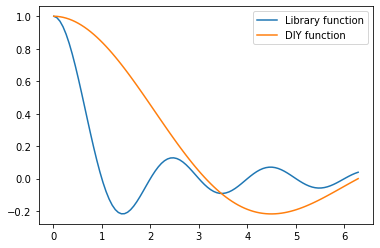

In [51]:
plt.plot(x, np.sinc(x), label='Library function')
plt.plot(x, np.sin(x)/x, label='DIY function')
plt.legend()
pass